In [ ]:
#Rashmi Duwadi
#240210

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/240210_RashmiDuwadi/240210_RashmiDuwadi_FinalPortfolio


/content/drive/MyDrive/240210_RashmiDuwadi/240210_RashmiDuwadi_FinalPortfolio


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

(a) When and by whom was the dataset created? The dataset was created by Yash Gupta in 2020.

(b) How did you access the dataset? The dataset was accessed from Kaggle.

(c) How does it align with the chosen UNSDG? The College Data project supports SDG 4: Quality Education by analyzing various factors that affect college admissions, graduation rates, and financial aspects. This helps in improving equitable access, education quality, and informed policymaking in higher education.

In [ ]:
df = pd.read_csv('College_Data.csv')

:

(d) List all the attributes (columns) present in the dataset.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777 entries, 0 to 776
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   College      777 non-null    object 
 1   Private      777 non-null    object 
 2   Apps         777 non-null    int64  
 3   Accept       777 non-null    int64  
 4   Enroll       777 non-null    int64  
 5   Top10perc    777 non-null    int64  
 6   Top25perc    777 non-null    int64  
 7   F.Undergrad  777 non-null    int64  
 8   P.Undergrad  777 non-null    int64  
 9   Outstate     777 non-null    int64  
 10  Room.Board   777 non-null    int64  
 11  Books        777 non-null    int64  
 12  Personal     777 non-null    int64  
 13  PhD          777 non-null    int64  
 14  Terminal     777 non-null    int64  
 15  S.F.Ratio    777 non-null    float64
 16  perc.alumni  777 non-null    int64  
 17  Expend       777 non-null    int64  
 18  Grad.Rate    777 non-null    int64  
dtypes: float

In [ ]:
shape=df.shape
print("The shape of dataset:",shape)

The shape of dataset: (777, 19)


In [ ]:
print("Missing Values:")
df.isnull().sum()

Missing Values:


,0
College,0
Private,0
Apps,0
Accept,0
Enroll,0
Top10perc,0
Top25perc,0
F.Undergrad,0
P.Undergrad,0
Outstate,0


In [ ]:
print("Dataset Preview:")
df.head()

Dataset Preview:


,College,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


In [ ]:
df.loc[df["Grad.Rate"] > 100, "Grad.Rate"] = 100

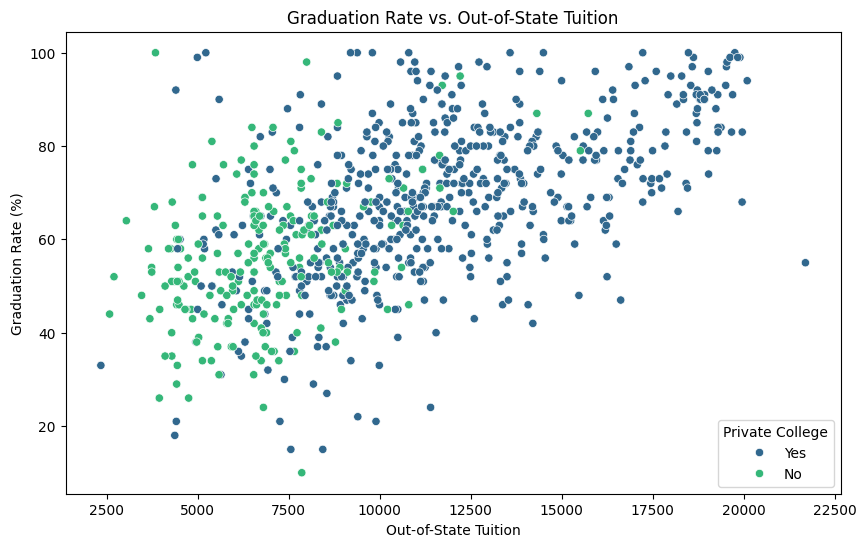

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x="Outstate", y="Grad.Rate", hue="Private", palette="viridis")
plt.title("Graduation Rate vs. Out-of-State Tuition")
plt.xlabel("Out-of-State Tuition")
plt.ylabel("Graduation Rate (%)")
plt.legend(title="Private College")
plt.show()

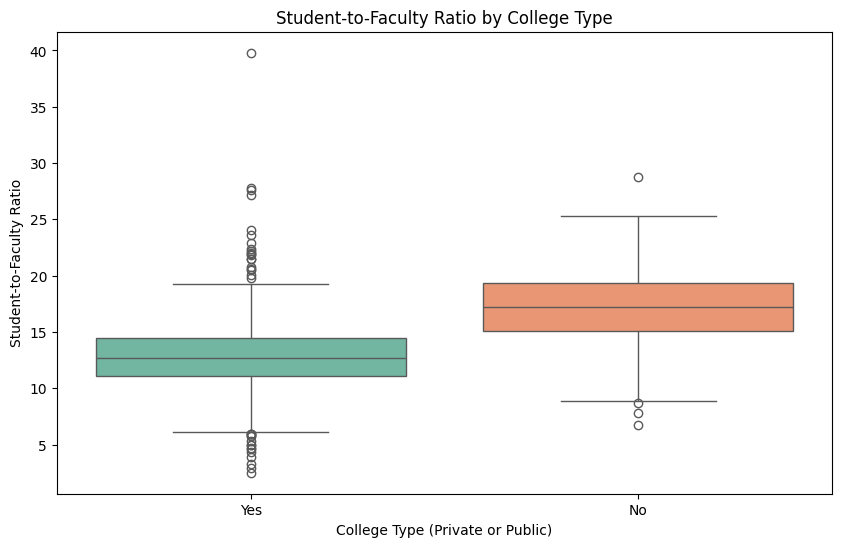

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x="Private", y="S.F.Ratio", hue="Private", palette="Set2")
plt.title("Student-to-Faculty Ratio by College Type")
plt.xlabel("College Type (Private or Public)")
plt.ylabel("Student-to-Faculty Ratio")
plt.show()

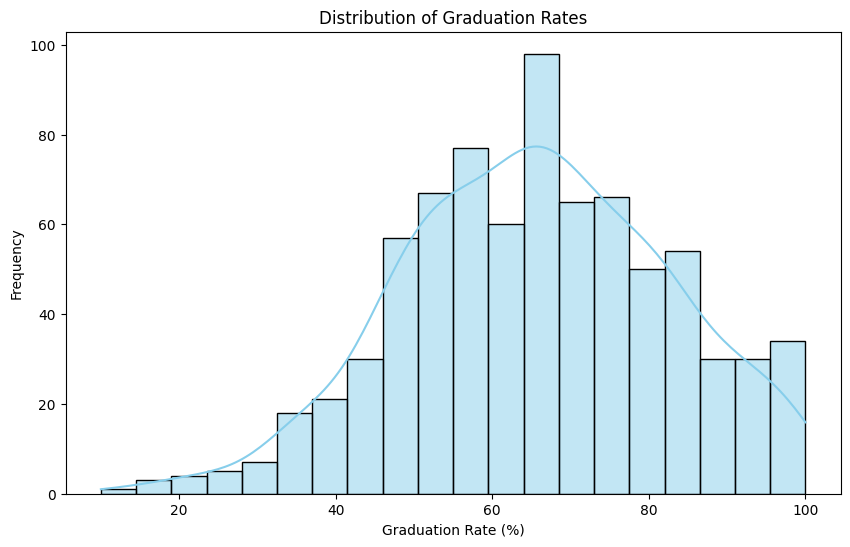

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df["Grad.Rate"], kde=True, bins=20, color="skyblue")
plt.title("Distribution of Graduation Rates")
plt.xlabel("Graduation Rate (%)")
plt.ylabel("Frequency")
plt.show()

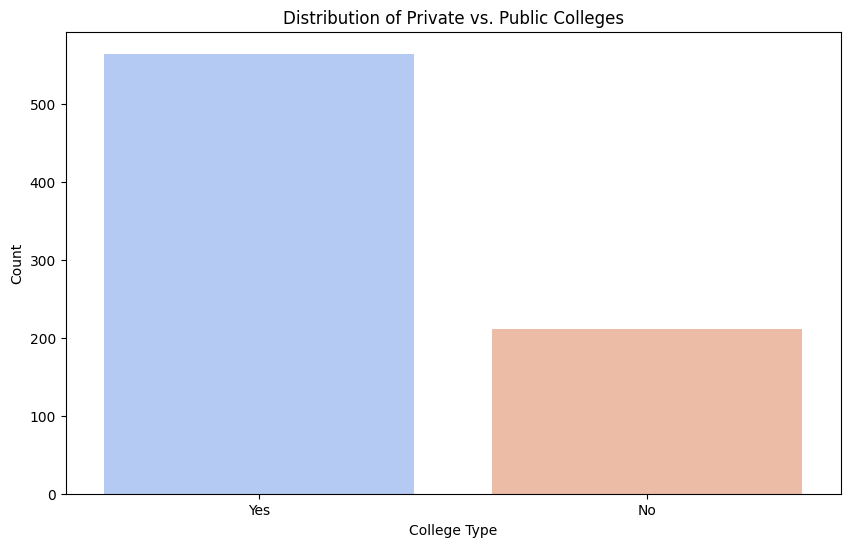

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x="Private", data=df, hue="Private", palette="coolwarm", legend=False)
plt.title("Distribution of Private vs. Public Colleges")
plt.xlabel("College Type")
plt.ylabel("Count")
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest, f_classif, RFE

Model from Scratch

In [ ]:
# Convert categorical 'Private' column to binary (1 = Private, 0 = Public)
df['Private'] = df['Private'].map({'Yes': 1, 'No': 0})

# Selecting features and target
X = df.drop(['College', 'Private'], axis=1)  # Features (excluding College Name & target)
y = df['Private']  # Target variable

In [ ]:
# Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [ ]:
# Sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Logistic Regression Model from Scratch
class LogisticRegressionScratch:
    def __init__(self, learning_rate=0.01, epochs=1000):
        self.learning_rate = learning_rate
        self.epochs = epochs

    def fit(self, X, y):
        self.m, self.n = X.shape
        self.weights = np.zeros(self.n)
        self.bias = 0

        # Gradient Descent
        for _ in range(self.epochs):
            model = sigmoid(np.dot(X, self.weights) + self.bias)
            dw = (1 / self.m) * np.dot(X.T, (model - y))
            db = (1 / self.m) * np.sum(model - y)

            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

    def predict(self, X):
        model = sigmoid(np.dot(X, self.weights) + self.bias)
        return [1 if i > 0.5 else 0 for i in model]

# Train model
log_reg = LogisticRegressionScratch(learning_rate=0.01, epochs=1000)
log_reg.fit(X_train, y_train)

# Predictions using Logistic Regression
y_train_pred_lr = log_reg.predict(X_train)
y_test_pred_lr = log_reg.predict(X_test)

In [ ]:
print("Logistic Regression - Train Accuracy:", accuracy_score(y_train, y_train_pred_lr))
print("Logistic Regression - Test Accuracy:", accuracy_score(y_test, y_test_pred_lr))
#print("Confusion Matrix:\n", confusion_matrix(y_test, y_test_pred_lr))
#print("Classification Report:\n", classification_report(y_test, y_test_pred_lr))

Logistic Regression - Train Accuracy: 0.9388083735909822
Logistic Regression - Test Accuracy: 0.9230769230769231


Primary Model

In [ ]:
# Train Logistic Regression Model
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

# Predictions using Logistic Regression
y_train_pred_lr = log_reg.predict(X_train)
y_test_pred_lr = log_reg.predict(X_test)

# Evaluation for Logistic Regression
print("Logistic Regression - Train Accuracy:", accuracy_score(y_train, y_train_pred_lr))
print("Logistic Regression - Test Accuracy:", accuracy_score(y_test, y_test_pred_lr))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_test_pred_lr))
print("Classification Report:\n", classification_report(y_test, y_test_pred_lr))


Logistic Regression - Train Accuracy: 0.9533011272141707
Logistic Regression - Test Accuracy: 0.9166666666666666
Confusion Matrix:
 [[ 41   6]
 [  7 102]]
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.87      0.86        47
           1       0.94      0.94      0.94       109

    accuracy                           0.92       156
   macro avg       0.90      0.90      0.90       156
weighted avg       0.92      0.92      0.92       156



In [ ]:
# Train Random Forest Model
rf_model = RandomForestClassifier(n_estimators=100, max_depth=None, random_state=42)
rf_model.fit(X_train, y_train)

# Predictions using Random Forest
y_train_pred_rf = rf_model.predict(X_train)
y_test_pred_rf = rf_model.predict(X_test)

# Evaluation for Random Forest
print("Random Forest - Train Accuracy:", accuracy_score(y_train, y_train_pred_rf))
print("Random Forest - Test Accuracy:", accuracy_score(y_test, y_test_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_test_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_test_pred_rf))


Random Forest - Train Accuracy: 1.0
Random Forest - Test Accuracy: 0.9358974358974359
Confusion Matrix:
 [[ 43   4]
 [  6 103]]
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.91      0.90        47
           1       0.96      0.94      0.95       109

    accuracy                           0.94       156
   macro avg       0.92      0.93      0.92       156
weighted avg       0.94      0.94      0.94       156



Hyper-parameter Optimization with Cross-Validation

In [ ]:
# Hyperparameter tuning for Logistic Regression
log_reg = LogisticRegression()
param_grid_lr = {'C': [0.01, 0.1, 1, 10], 'solver': ['liblinear', 'lbfgs']}
grid_search_lr = GridSearchCV(log_reg, param_grid_lr, cv=5, scoring='accuracy')
grid_search_lr.fit(X_train, y_train)
best_log_reg = grid_search_lr.best_estimator_

In [ ]:
# Hyperparameter tuning for Random Forest
rf_model = RandomForestClassifier(random_state=42)
param_grid_rf = {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20]}
grid_search_rf = GridSearchCV(rf_model, param_grid_rf, cv=5, scoring='accuracy')
grid_search_rf.fit(X_train, y_train)
best_rf = grid_search_rf.best_estimator_

In [ ]:
# Train and evaluate Logistic Regression
y_test_pred_lr = best_log_reg.predict(X_test)
print("Best Logistic Regression Parameters:", grid_search_lr.best_params_)
print("Logistic Regression Test Accuracy:", accuracy_score(y_test, y_test_pred_lr))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_test_pred_lr))
print("Classification Report:\n", classification_report(y_test, y_test_pred_lr))

# Train and evaluate Random Forest
y_test_pred_rf = best_rf.predict(X_test)
print("Best Random Forest Parameters:", grid_search_rf.best_params_)
print("Random Forest Test Accuracy:", accuracy_score(y_test, y_test_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_test_pred_rf))
print("Classification Report:\n",  classification_report(y_test, y_test_pred_rf))

Best Logistic Regression Parameters: {'C': 1, 'solver': 'liblinear'}
Logistic Regression Test Accuracy: 0.9166666666666666
Confusion Matrix:
 [[ 41   6]
 [  7 102]]
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.87      0.86        47
           1       0.94      0.94      0.94       109

    accuracy                           0.92       156
   macro avg       0.90      0.90      0.90       156
weighted avg       0.92      0.92      0.92       156

Best Random Forest Parameters: {'max_depth': None, 'n_estimators': 200}
Random Forest Test Accuracy: 0.9294871794871795
Confusion Matrix:
 [[ 42   5]
 [  6 103]]
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.89      0.88        47
           1       0.95      0.94      0.95       109

    accuracy                           0.93       156
   macro avg       0.91      0.92      0.92       156
weighted avg       0.93   

Feature Selection

In [ ]:
#Feature Selection using SelectKBest
selector = SelectKBest(score_func=f_classif, k=10)  # Selecting top 10 features
X_selected = selector.fit_transform(X, y)
selected_features = X.columns[selector.get_support()]
print("Selected Features:", selected_features)

Selected Features: Index(['Apps', 'Accept', 'Enroll', 'F.Undergrad', 'P.Undergrad', 'Outstate',
       'Room.Board', 'S.F.Ratio', 'perc.alumni', 'Grad.Rate'],
      dtype='object')


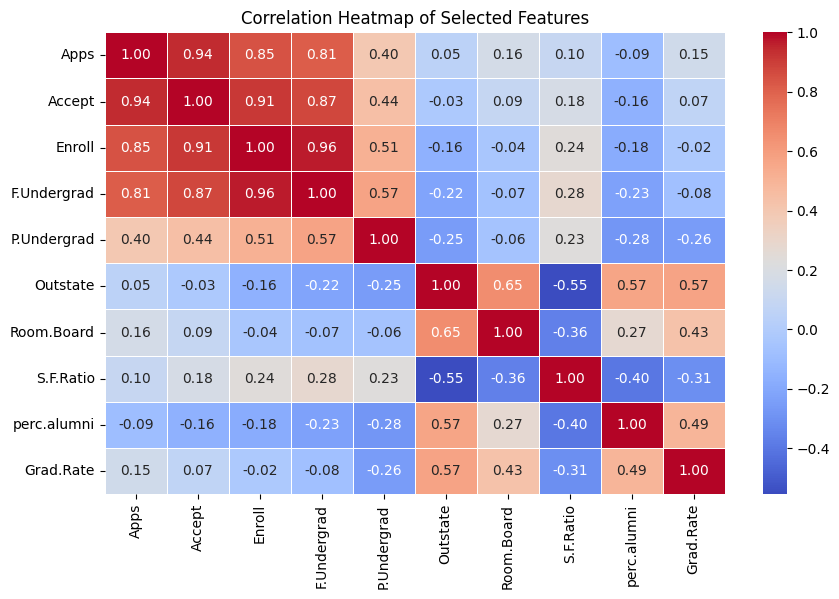

In [ ]:
# Feature Selection using SelectKBest
selector = SelectKBest(score_func=f_classif, k=10)  # Selecting top 10 features
X_selected = selector.fit_transform(X, y)
selected_features = X.columns[selector.get_support()]

# Create correlation matrix for selected features
selected_corr_matrix = df[selected_features].corr()

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(selected_corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Selected Features")
plt.show()

Final Model

In [ ]:
# Final Model Training and Evaluation

# Train and evaluate Logistic Regression with best hyperparameters and selected features
y_test_pred_lr = best_log_reg.predict(X_test)
print("Best Logistic Regression Parameters:", grid_search_lr.best_params_)
print("Logistic Regression Test Accuracy:", accuracy_score(y_test, y_test_pred_lr))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_test_pred_lr))
print("Classification Report:\n", classification_report(y_test, y_test_pred_lr))

y_test_pred_rf = best_rf.predict(X_test)
print("Best Random Forest Parameters:", grid_search_rf.best_params_)
print("Random Forest Test Accuracy:", accuracy_score(y_test, y_test_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_test_pred_rf))
print("Classification Report:\n",  classification_report(y_test, y_test_pred_rf))

# Compare and Conclude
if accuracy_score(y_test, y_test_pred_lr) > accuracy_score(y_test, y_test_pred_rf):
    print("Final Model: Logistic Regression performed better.")
else:
    print("Final Model: Random Forest performed better.")


Best Logistic Regression Parameters: {'C': 1, 'solver': 'liblinear'}
Logistic Regression Test Accuracy: 0.9166666666666666
Confusion Matrix:
 [[ 41   6]
 [  7 102]]
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.87      0.86        47
           1       0.94      0.94      0.94       109

    accuracy                           0.92       156
   macro avg       0.90      0.90      0.90       156
weighted avg       0.92      0.92      0.92       156

Best Random Forest Parameters: {'max_depth': None, 'n_estimators': 200}
Random Forest Test Accuracy: 0.9294871794871795
Confusion Matrix:
 [[ 42   5]
 [  6 103]]
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.89      0.88        47
           1       0.95      0.94      0.95       109

    accuracy                           0.93       156
   macro avg       0.91      0.92      0.92       156
weighted avg       0.93   

Conclusion

Model Performance:

Both models performed well in classifying colleges as private or public. The Logistic Regression model achieved an accuracy of 91.67%, with an F1-score of 0.94 for private and 0.86 for public colleges, indicating strong predictive power. The Random Forest model slightly outperformed it with 92.95% accuracy, showing better precision and recall. Overall, both models demonstrated high accuracy, with Random Forest delivering more balanced performance across key metrics.

Impact of Methods:

The applied techniques, such as Cross-Validation and Feature Selection, positively impacted model performance. Cross-Validation ensured robust evaluation, reducing overfitting and improving generalization. Feature Selection enhanced model efficiency by focusing on the most relevant features, reducing noise and computation time. Together, these methods improved accuracy and consistency, with the Random Forest model benefiting the most, achieving higher precision and recall compared to models without these optimizations.

Insights and Future Directions:

This experiment highlighted the importance of feature selection and hyperparameter tuning in enhancing model performance. We learned that focusing on relevant features improves accuracy, while cross-validation ensures robust evaluation. Future work could explore advanced models like Gradient Boosting or Neural Networks, apply ensemble techniques for better performance, and analyze larger datasets to improve generalizability. Additionally, incorporating domain-specific features may further refine classification accuracy.